In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import time
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_20agent.py import Agent

from unityagents import UnityEnvironment

In [2]:
# 20 agents
env = UnityEnvironment(file_name='Reacher_Windows_x86_64_20/Reacher.exe') 

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33


In [4]:
# DDPG agent initialization 
agent = Agent(num_agent=states.shape[0], state_size=env_info.vector_observations.shape[1], action_size=brain.vector_action_space_size, random_seed=40)

In [6]:
n_episodes = 700
max_t = 2000
save_episodes = 100
scores_deque = deque(maxlen=save_episodes)
scores = []
avg_scores = []

print_every = 1

start_time = time.time()

for i_episode in range(1, n_episodes+1):
    
    agent.reset()                                          # reset agent 
    env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    score = np.zeros(num_agents)                          # initialize the score (for each agent)
    
    for t in range(max_t):

        actions = agent.act(states)
        actions = np.clip(actions, -1, 1) 

        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished        
        score += env_info.rewards                         # update the score (for each agent)
        
        agent.step(states, actions, rewards, next_states, dones)
        states = next_states                               # roll over states to next time step
        
        if np.any(dones):
            break 
    
    # average score of 20 agents
    score = np.mean(score)
    scores_deque.append(score)
    scores.append(score)
    avg_scores.append(np.mean(scores_deque))
    
    if np.mean(scores_deque) >= 30:
        # the agent achieve average of 30 for 100 consecutive episodes
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        print('\rFinish on Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))   
        break 
    
    if i_episode % print_every == 0:
        # training time
        end_time = time.time()
        total_train_time = end_time - start_time
        start_time = time.time()
        
        print('\rEpisode {}\tAverage Score: {:.2f} \tMax Score: {:.2f} \tScore: {:.2f} \tTime: {}'.format(i_episode, 
                                                                                     np.mean(scores_deque),
                                                                                     np.max(scores_deque),                     
                                                                                     score, 
                                                                                     datetime.timedelta(seconds=int(total_train_time))))#, end="")
    if i_episode % save_episodes == 0:
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))   

Episode 1	Average Score: 0.75 	Max Score: 0.75 	Score: 0.75 	Time: 0:00:36
Episode 2	Average Score: 0.81 	Max Score: 0.87 	Score: 0.87 	Time: 0:00:35
Episode 3	Average Score: 1.01 	Max Score: 1.39 	Score: 1.39 	Time: 0:00:34
Episode 4	Average Score: 1.17 	Max Score: 1.66 	Score: 1.66 	Time: 0:00:35
Episode 5	Average Score: 1.27 	Max Score: 1.68 	Score: 1.68 	Time: 0:00:36
Episode 6	Average Score: 1.32 	Max Score: 1.68 	Score: 1.59 	Time: 0:00:36
Episode 7	Average Score: 1.30 	Max Score: 1.68 	Score: 1.15 	Time: 0:00:36
Episode 8	Average Score: 1.25 	Max Score: 1.68 	Score: 0.91 	Time: 0:00:36
Episode 9	Average Score: 1.24 	Max Score: 1.68 	Score: 1.17 	Time: 0:00:36
Episode 10	Average Score: 1.23 	Max Score: 1.68 	Score: 1.10 	Time: 0:00:36
Episode 11	Average Score: 1.24 	Max Score: 1.68 	Score: 1.37 	Time: 0:00:35
Episode 12	Average Score: 1.26 	Max Score: 1.68 	Score: 1.49 	Time: 0:00:35
Episode 13	Average Score: 1.31 	Max Score: 1.91 	Score: 1.91 	Time: 0:00:36
Episode 14	Average Sc

Episode 107	Average Score: 16.32 	Max Score: 31.36 	Score: 29.71 	Time: 0:01:11
Episode 108	Average Score: 16.60 	Max Score: 31.36 	Score: 28.78 	Time: 0:01:12
Episode 109	Average Score: 16.88 	Max Score: 31.36 	Score: 29.40 	Time: 0:01:13
Episode 110	Average Score: 17.17 	Max Score: 31.36 	Score: 29.94 	Time: 0:01:13
Episode 111	Average Score: 17.46 	Max Score: 31.36 	Score: 30.19 	Time: 0:01:14
Episode 112	Average Score: 17.75 	Max Score: 31.36 	Score: 30.44 	Time: 0:01:14
Episode 113	Average Score: 18.04 	Max Score: 31.62 	Score: 31.62 	Time: 0:01:14
Episode 114	Average Score: 18.32 	Max Score: 31.62 	Score: 29.05 	Time: 0:01:15
Episode 115	Average Score: 18.61 	Max Score: 31.62 	Score: 30.73 	Time: 0:01:15
Episode 116	Average Score: 18.88 	Max Score: 31.62 	Score: 30.00 	Time: 0:01:16
Episode 117	Average Score: 19.17 	Max Score: 31.62 	Score: 30.90 	Time: 0:01:16
Episode 118	Average Score: 19.47 	Max Score: 32.11 	Score: 32.11 	Time: 0:01:17
Episode 119	Average Score: 19.76 	Max Sc

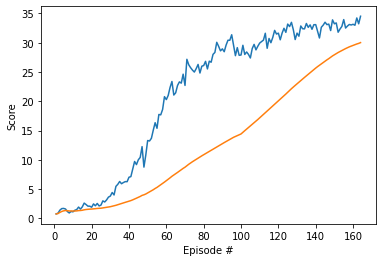

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.plot(np.arange(1, len(avg_scores)+1), avg_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [8]:
env.close()